In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
!python -m pip install plantcv

You should consider upgrading via the 'C:\Users\Sid\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install plantcv --user

In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import os

In [11]:
from plantcv import plantcv as pcv

In [44]:
%cd ../../

C:\Users\Sid\Desktop\ShivaniPracticum


In [18]:
import time
img_dir = "."
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
#thermal_train_images_list = []
thermal_images_list  = []
#visible_train_images_list = []
visible_images_list = []
for dirpath, dirs, files in os.walk(img_dir):  
  #print('1. %s ' % dirpath)
  #type(dirpath)
  #print('2. %s' % dirs)
  #print('3. %s' % files)

  #arr = [ 'set00', 'set01', 'set02', 'set03', 'set04', 'set05']
  for filename in files: 
    fname = os.path.join(dirpath,filename) 
    #print('4. %s' % filename)
    if fname.endswith('.jpg'): 
        img = cv2.imread(fname)
        print('5. %s' %fname)
        #time.sleep(0.5)
        if fname.find('lwir') != -1:
            #if any(f in fname for f in arr) :
            print('therm train')
            #thermal_train_images_list.append(img)
            #else:
            #print('therm test')
            thermal_images_list.append(img)
        if fname.find('visible') != -1:
            #if any(f in fname for f in arr):
            print('vis train')
            #visible_train_images_list.append(img)
            #else:
            #print('vis test')
            visible_images_list.append(img)
            

Streaming output truncated to the last 5000 lines.
vis train
5. .\visible\I00421.jpg
vis train
5. .\visible\I00422.jpg
vis train
5. .\visible\I00423.jpg
vis train
5. .\visible\I00424.jpg
vis train
5. .\visible\I00425.jpg
vis train
5. .\visible\I00426.jpg
vis train
5. .\visible\I00427.jpg
vis train
5. .\visible\I00428.jpg
vis train
5. .\visible\I00429.jpg
vis train
5. .\visible\I00430.jpg
vis train
5. .\visible\I00431.jpg
vis train
5. .\visible\I00432.jpg
vis train
5. .\visible\I00433.jpg
vis train
5. .\visible\I00434.jpg
vis train
5. .\visible\I00435.jpg
vis train
5. .\visible\I00436.jpg
vis train
5. .\visible\I00437.jpg
vis train
5. .\visible\I00438.jpg
vis train
5. .\visible\I00439.jpg
vis train
5. .\visible\I00440.jpg
vis train
5. .\visible\I00441.jpg
vis train
5. .\visible\I00442.jpg
vis train
5. .\visible\I00443.jpg
vis train
5. .\visible\I00444.jpg
vis train
5. .\visible\I00445.jpg
vis train
5. .\visible\I00446.jpg
vis train
5. .\visible\I00447.jpg
vis train
5. .\visible\I00448.j

In [14]:
len(thermal_train_images_list)

1861

In [19]:
len(visible_images_list)

2920

In [20]:
thermal = [None] * 1000; 
for i in range(0,500):
  thermal[i]=thermal_train_images_list[i]
for i in range(500,1000):
  thermal[i]=thermal_images_list[i-500]

In [21]:
visible = [None] * 1000; 
for i in range(0,500):
  visible[i]=visible_train_images_list[i]
for i in range(500,1000):
  visible[i]=visible_images_list[i-500]

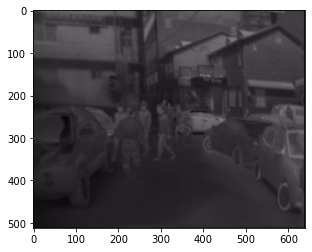

In [26]:
plt.imshow(thermal[150])

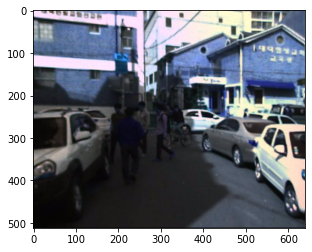

In [27]:
plt.imshow(visible[150])

In [30]:
temp = thermal[999]
tmp = visible[999]

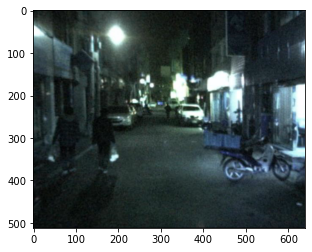

In [31]:
plt.imshow(tmp)

In [32]:
"""
class options:
    def __init__(self):
        self.image = temp
        self.debug = "plot"
        self.writeimg= False
        self.result = "./results.txt"
        self.outdir = "."
        
# Get options
#args = options()
"""
# Set debug to the global parameter 
pcv.params.debug = "plot"

In [33]:
thrm_temp = np.mean(temp, axis=2)

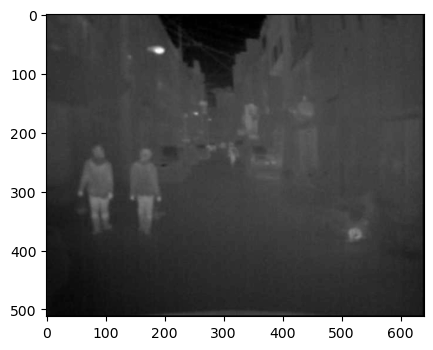

In [34]:
scaled_thermal_img = pcv.transform.rescale(gray_img=thrm_temp, min_value=0, max_value=255)


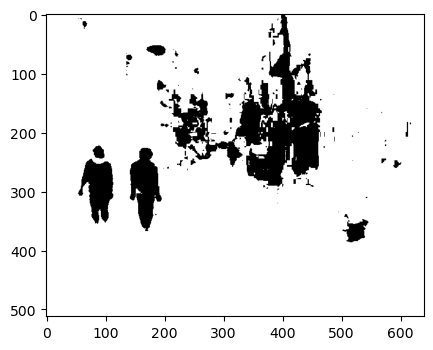

In [40]:
bin_mask1 = pcv.threshold.binary(gray_img=scaled_thermal_img, threshold=75, max_value=255, object_type='dark')

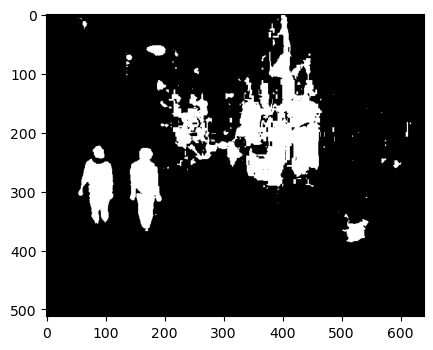

In [36]:
bin_mask2 = pcv.threshold.binary(gray_img=scaled_thermal_img, threshold=75, max_value=255, object_type='light')

In [ ]:
plt.imshow(bin_mask)

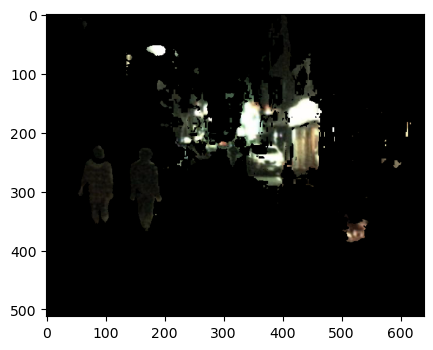

In [41]:
masked_img = pcv.apply_mask(img=tmp, mask=bin_mask2, mask_color='black')

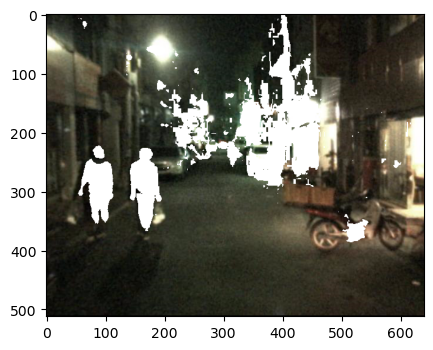

In [42]:
mask_img = pcv.apply_mask(img=tmp, mask=bin_mask1, mask_color='white')

In [ ]:
from __future__ import print_function
import cv2 as cv
import sys
alpha = 0.5
try:
    raw_input          # Python 2
except NameError:
    raw_input = input  # Python 3
print(''' Simple Linear Blender
-----------------------
* Enter alpha [0.0-1.0]: ''')
input_alpha = float(raw_input().strip())
if 0 <= alpha <= 1:
    alpha = input_alpha

#src1 = cv.imread(temp, 0)
#src2 = cv.imread(tmp, 0)
"""
if src1 is None:
    print("Error loading thermal image")
    exit(-1)
elif src2 is None:
    print("Error loading rgb image")
    exit(-1)
# [blend_images]
"""

blended_images = [None] * 1000
beta = (1.0 - alpha)
for i in range(0,1000):
  blended_images[i] = cv.addWeighted(thermal[i], alpha, visible[i], beta, 0.0)
# [blend_images]
# [display]
#plt.imshow(dst)

 Simple Linear Blender
-----------------------
* Enter alpha [0.0-1.0]: 
0.75
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

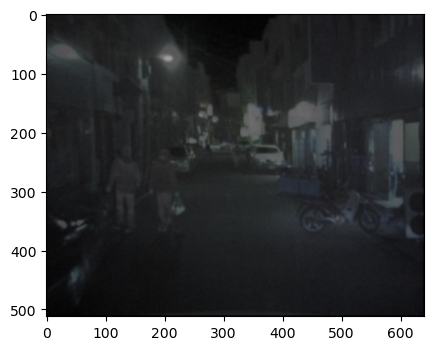

In [ ]:
plt.imshow(blended_images[985])

In [ ]:
%cd blended/

G:\ThinkPad\Practicum\KAIST\images\data\blended


In [ ]:
s1 = 'I0000'
s2 = 'I000'
s3 = 'I00'
jpg = '.jpg'

for i in range(0,1000):
  if i<10:
    print('less than 10')
    cv2.imwrite(s1+str(i)+jpg, blended_images[i])
  elif i>=10 and i<100:
    print('between 10 and 100')
    cv2.imwrite(s2+str(i)+jpg, blended_images[i])
  else:
    print('more than 100')
    cv2.imwrite(s3+str(i)+jpg, blended_images[i])
  

In [ ]:
%cd blended/anno/

G:\ThinkPad\Practicum\KAIST\images\data\blended\anno


In [ ]:
for count, filename in enumerate(os.listdir(".")): 
        src =filename 
        print('src:', src)
        dst ="I00" + str(count+500) + ".txt" 
        print('dst:', dst)  
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

In [ ]:
pcv.params.debug = "plot"